### 使用keras实现logistic回归

### 加载数据集

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import tensorflow as tf

In [2]:
breast_dataset = load_breast_cancer()

In [3]:
breast = pd.DataFrame(breast_dataset.data, columns=breast_dataset.feature_names)

In [4]:
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# 对数据做归一化
breast = (breast - breast.min())/(breast.max()-breast.min())

In [6]:
breast['y'] = breast_dataset.target

In [7]:
breast.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0


In [8]:
breast.shape

(569, 31)

In [9]:
breast.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'y'],
      dtype='object')

<AxesSubplot:>

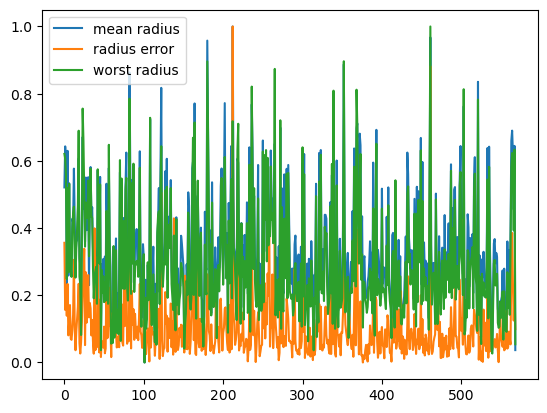

In [10]:
breast[['mean radius','radius error','worst radius']].plot()

<AxesSubplot:>

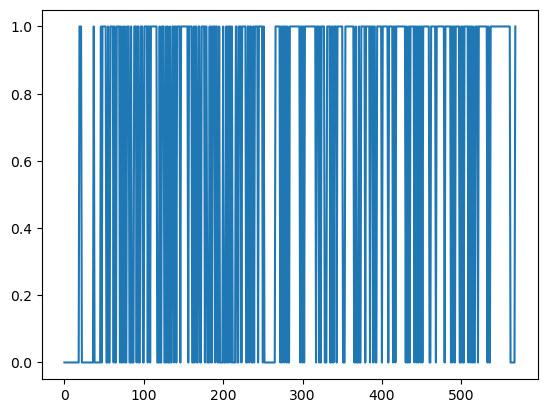

In [11]:
breast['y'].plot()

In [12]:
set(breast['y'])

{0, 1}

### 划分数据集 

In [13]:
test_dataset = breast.iloc[-int(0.2*len(breast)):,:]
train_dataset = breast.iloc[:-int(0.2*len(breast)),:]

In [14]:
print(test_dataset.shape, train_dataset.shape)

(113, 31) (456, 31)


In [15]:
test_dataset = tf.convert_to_tensor(test_dataset)
X_test = test_dataset[:,:-1]
y_test = test_dataset[:,-1]
train_dataset = tf.convert_to_tensor(train_dataset)
X_train = train_dataset[:,:-1]
y_train = train_dataset[:,-1]

### 读取数据集

In [16]:
def load_array(data_arrays, batch_size, is_train=True):
    dataset = tf.data.Dataset.from_tensor_slices(data_arrays)
    if is_train:
        dataset = dataset.shuffle(buffer_size=len(data_arrays))
    dataset = dataset.batch(batch_size)
    return dataset

In [17]:
batch_size = 10
data_iter = load_array((train_dataset[:,:-1],train_dataset[:,-1]), batch_size, True)

In [18]:
for data in data_iter:
    print(data)
    break

(<tf.Tensor: shape=(10, 30), dtype=float64, numpy=
array([[0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
        0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
        0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
        0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
        0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
        0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396],
       [0.60149557, 0.3902604 , 0.59574321, 0.44941676, 0.51430893,
        0.4310165 , 0.46251172, 0.63568588, 0.50959596, 0.21124684,
        0.22962158, 0.09430251, 0.18037035, 0.16292179, 0.15083115,
        0.2839547 , 0.09676768, 0.38984656, 0.20569032, 0.12700551,
        0.55638563, 0.36007463, 0.50844166, 0.37450845, 0.48358978,
        0.38537513, 0.35974441, 0.83505155, 0.40370589, 0.21343303],
       [0.64314449, 0.27257355, 0.61578329, 0.50159067, 0.28987993,
        0.18176799, 0.20360825, 0.34875746, 0.37979798, 0.14132

### 定义模型

In [19]:
net = tf.keras.Sequential()
initializer = tf.keras.initializers.Zeros()
net.add(tf.keras.layers.Dense(1, kernel_initializer=initializer, 
                                #  kernel_regularizer=tf.keras.regularizers.L1(0.02),
                                #  bias_regularizer=tf.keras.regularizers.L2(0.01),
                                 activation='sigmoid'))
# net.add(tf.keras.layers.Activation('sigmoid'))

### 定义损失函数

In [20]:
# from_logits指接收在dense加了sigmoid激活函数的输出
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

### 定义优化算法

In [21]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

### 定义评估函数

In [22]:
def evaluate(y_pred, y):
    ones = tf.ones_like(y_pred)
    zeros = tf.zeros_like(y_pred)
    output = tf.where(y_pred > 0.5 , ones, zeros)
    y = tf.reshape(y, output.shape)
    res = tf.reduce_sum(tf.where(y == tf.cast(output, dtype=y.dtype), ones, zeros))/y.shape[0]
    return res.numpy()

### 训练

In [23]:
num_epochs = 15

In [24]:
res = []
for epoch in range(num_epochs):
    for X, y in data_iter:
        with tf.GradientTape() as tape:
            y_pred = net(X, training=True) 
            l =loss(y_true=tf.reshape(y,y_pred.shape), y_pred=y_pred)
        grads = tape.gradient(l, net.trainable_variables)
        optimizer.apply_gradients(zip(grads, net.trainable_variables))
    train_loss = loss(y_pred=net(X_train), y_true=y_train)
    train_acc = evaluate(net(X_train), y_train)
    test_loss = loss(y_pred=net(X_test), y_true=y_test)
    test_acc = evaluate(net(X_test), y_test)
    print('epoch:{}, train_loss:{}, train_acc:{}, test_loss:{}, test_acc:{}'\
        .format(epoch+1, float(tf.reduce_mean(train_loss)), train_acc,
                         float(tf.reduce_mean(test_loss)), test_acc))
    res.append([epoch+1, float(tf.reduce_mean(train_loss)), train_acc, float(tf.reduce_mean(test_loss)), test_acc])


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

epoch:1, train_loss:0.6418069005012512, train_acc:0.5767543911933899, test_loss:0.5718725919723511, test_acc:0.40707963705062866
epoch:2, train_loss:0.6234610676765442, train_acc:0.905701756477356, test_loss:0.5470520853996277, test_acc:0.8230088353157043
epoch:3, train_loss:0.6079116463661194, train_acc:0.9342105388641357, test_loss:0.5274707078933716, test_acc:0.9115044474601746
epoch:4, train_loss:0.5945494174957275, train_acc:0.9385964870452881, test_loss:0.513658881187439, test_acc:0.94690263271331

In [25]:
import numpy as np

res_df = pd.DataFrame(np.array(res).reshape((-1, 5)), columns=['epoch', 'train_loss', 'train_acc', 'test_loss', 'test_acc'])
res_df.set_index('epoch', inplace=True)

<AxesSubplot:xlabel='epoch'>

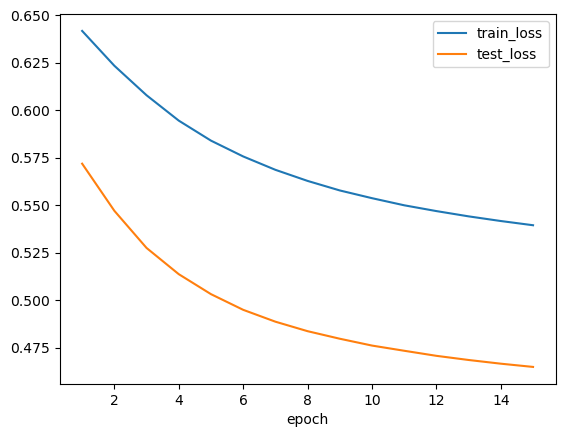

In [26]:
res_df[['train_loss', 'test_loss']].plot()

<AxesSubplot:xlabel='epoch'>

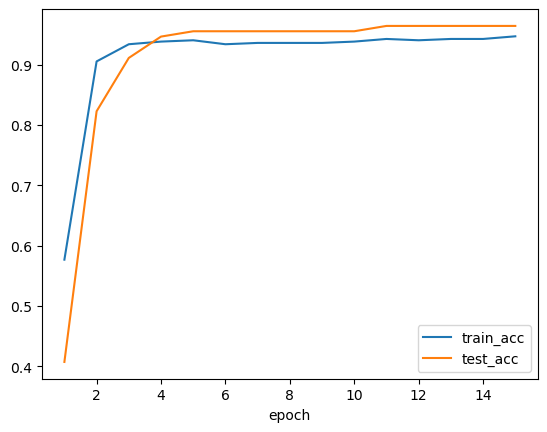

In [27]:
res_df[['train_acc', 'test_acc']].plot()